# Time Series Basics

## Imports

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Datetime Direct From CSV

In [13]:
df = pd.read_csv('data/temp.csv', parse_dates=['datetime'], index_col='datetime')

In [15]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [17]:
type(df.iloc[0,0])

numpy.float64

In [18]:
df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

## Converting Strings to Datetime Objects

In [25]:
df = pd.read_csv('data/temp.csv')

In [26]:
df.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [31]:
type(df.datetime[0])

str

In [33]:
pd.to_datetime(df.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [35]:
df = df.set_index(pd.to_datetime(df.datetime)).drop("datetime", axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [38]:
pd.to_datetime("2015-05-20 10:30:20")

Timestamp('2015-05-20 10:30:20')

In [39]:
pd.to_datetime("20150520")

Timestamp('2015-05-20 00:00:00')

In [40]:
pd.to_datetime("2015/05/20")

Timestamp('2015-05-20 00:00:00')

In [41]:
pd.to_datetime("2015 05 20")

Timestamp('2015-05-20 00:00:00')

In [42]:
pd.to_datetime("2015 May 20")

Timestamp('2015-05-20 00:00:00')

In [43]:
pd.to_datetime("May 2015 20")

Timestamp('2015-05-20 00:00:00')

In [44]:
pd.to_datetime("2015 20th may")

Timestamp('2015-05-20 00:00:00')

In [46]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"], format = "mixed") 

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [49]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], format = "mixed", errors="coerce")

DatetimeIndex(['2015-05-20', '2015-02-20', 'NaT'], dtype='datetime64[ns]', freq=None)

## Initial Analysis and Visualization of Time Series

In [50]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [51]:
df.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [53]:
df.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [55]:
df.LA.value_counts()

LA
 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
 40.7      1
 39.5      1
 37.0      1
 37.6      1
-3.3       1
Name: count, Length: 442, dtype: int64

array([[<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>]],
      dtype=object)

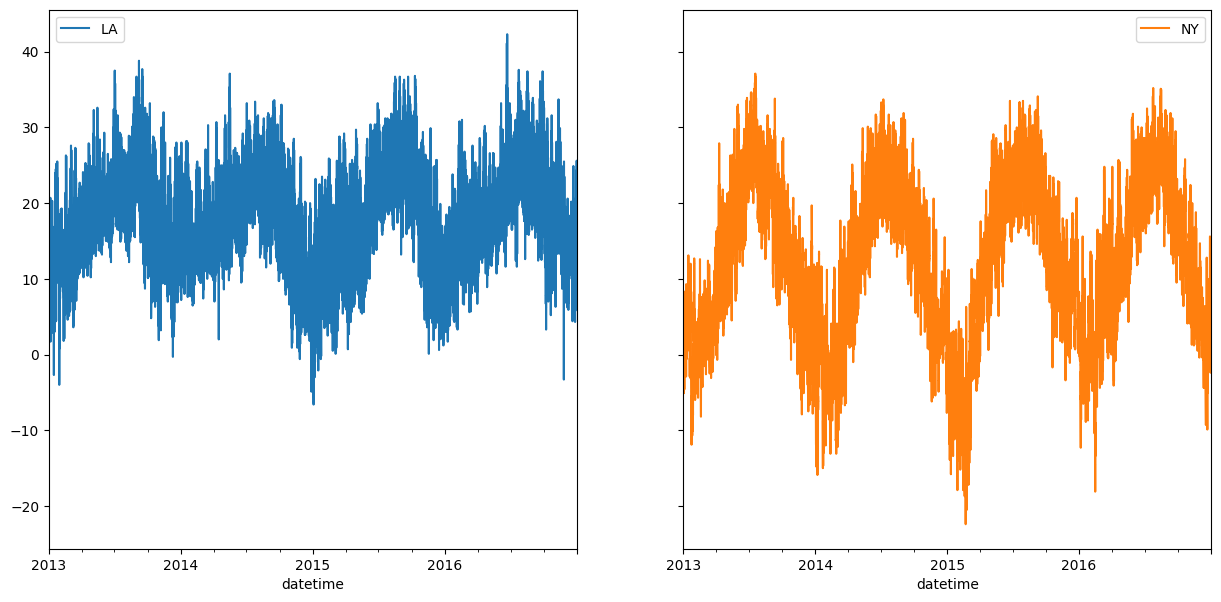

In [61]:
df.plot(figsize=(15,7), subplots=True, layout=(1,2), sharey=True)

## Indexing and Slicing Time Series

In [62]:
df = pd.read_csv("data/temp.csv", parse_dates= ["datetime"], index_col= "datetime")

In [63]:
df.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [66]:
df.loc["2013-01-01 01:00:00"]

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [67]:
df.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [68]:
df.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [69]:
df.loc["2015-01-01" : "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [70]:
df.loc["2015-01-01" : "2015-12-31"].equals(df.loc["2015"])

True

In [71]:
df.loc["2015-05-20":]

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [72]:
df.loc[:"2015-05-20"]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2015-05-20 19:00:00,17.7,18.1
2015-05-20 20:00:00,18.4,17.8
2015-05-20 21:00:00,18.0,17.8


In [73]:
df.loc["20FEBRUARY2015"]

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5
2015-02-20 05:00:00,8.9,-15.9
2015-02-20 06:00:00,9.0,-15.9
2015-02-20 07:00:00,7.1,-15.9
2015-02-20 08:00:00,6.6,-16.8


In [74]:
two_timestamps = pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
two_timestamps

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [75]:
df.loc[two_timestamps]

,LA,NY
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6
